In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [10]:
boston = datasets.load_boston()
#print(boston.DESCR)
print(boston.feature_names)
x = boston.data[:,5]
y = boston.target

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [13]:
print(x.shape)
print(y.shape)

(506,)
(506,)


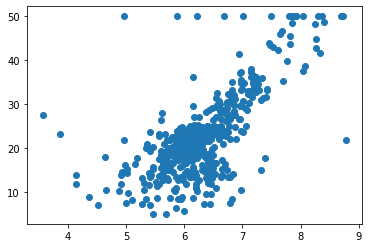

In [15]:
plt.scatter(x, y)
plt.show()

In [16]:
np.max(y)

50.0

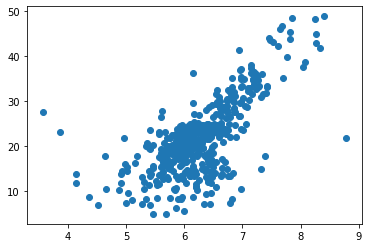

In [19]:
# 噪音点清除
x = x[y < 50.0]
y = y[y < 50.0]
plt.scatter(x, y)

In [51]:
%run knn/knn_classify.py
%run linear/simple_linear_regression2.py
%run linear/metrics.py

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(392,)
(392,)
(98,)
(98,)


In [33]:
reg = SimpleLinearRegression2()
reg.fit(x_train, y_train)
print(reg.a_)
print(reg.b_)

8.605213071991665
-32.14983620585757


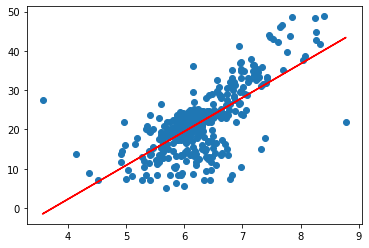

In [37]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color="r")

In [38]:
y_predict = reg.predict(x_test)

In [40]:
# MSE
mse_test = np.sum((y_predict - y_test) ** 2) / len(y_test)
mse_test

30.799697771015495

In [45]:
# RMSE
from math import sqrt
rmse_test = sqrt(mse_test)
rmse_test

5.549747541196401

In [48]:
# MAE
mae_test = np.sum(np.absolute(y_predict - y_test)) / len(y_test)
mae_test

4.134538928486009

In [58]:
# 测试一下封装的metrics评估函数
a = mean_squared_error(y_test, y_predict)
b = root_mean_squared_error(y_test, y_predict)
c = mean_absolute_error(y_test, y_predict)
print(a, b, c)

30.799697771015495 5.549747541196401 4.134538928486009


In [65]:
# sklearn 中的 MSE MAE 
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))

30.799697771015495
4.134538928486009
